<a href="https://colab.research.google.com/github/vanessaleija2025-png/LEIJA-CARDENAS-FATIMA-VANESSA---IVAN-SANCHEZ-FLORES-/blob/main/ivan_y_vanessa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("datasets/Spotify_Youtube.csv")
data.head()
data.shape

(20718, 28)

In [4]:
# Crear la nueva columna "Likes_to_Views" como proporción de Likes respecto a Views
data['Likes_to_Views'] = (data['Likes'] / data['Views']).round(2)

# Agrupar por "Album_type" y calcular estadísticas
album_analysis = data.groupby('Album_type').agg({
    'Energy': ['mean', 'median'],
    'Danceability': ['mean', 'median'],
    'Views': 'sum',
    'Stream': 'sum'
}).reset_index()

print(album_analysis.head())

    Album_type    Energy        Danceability                 Views  \
                    mean median         mean  median           sum   
0        album  0.625870  0.657     0.607083  0.6220  1.438910e+12   
1  compilation  0.603078  0.655     0.573004  0.5880  6.122649e+10   
2       single  0.668292  0.692     0.665004  0.6825  4.019165e+11   

         Stream  
            sum  
0  2.183383e+12  
1  6.166176e+10  
2  4.931032e+11  


In [7]:
# Filtrar canciones con proporción "Likes_to_Views" menor a 0.01
low_likes = data[data['Likes_to_Views'] < 0.01]

# Calcular el número total de canciones por "Album_type"
low_likes_summary = low_likes.groupby('Album_type').size().reset_index(name='count')

low_likes_summary.head()

,Album_type,count
0,album,3162
1,compilation,122
2,single,352


/tmp/ipython-input-1216975028.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Album Type')


<Axes: title={'center': 'Relación entre Energy y Stream para canciones con baja proporción de Likes'}, xlabel='Energy', ylabel='Stream (promedio)'>

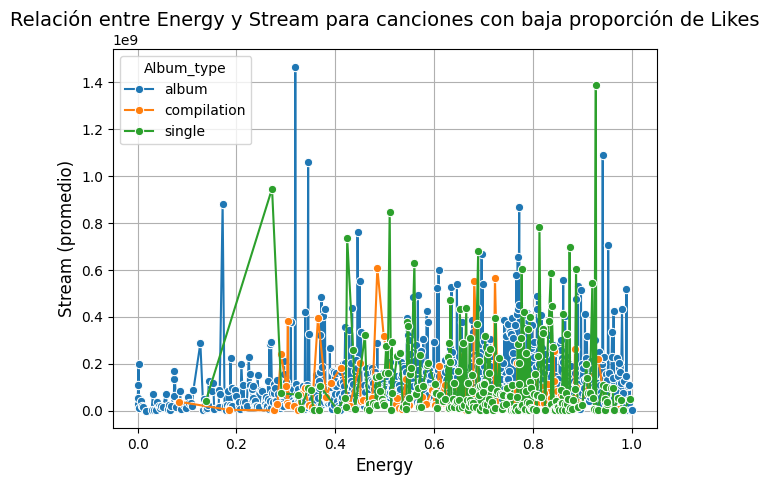

In [8]:
# Promedio de "Stream" por "Energy" y "Album_type" en el subconjunto `low_likes`
trend_data = low_likes.groupby(['Album_type', 'Energy']).agg({'Stream': 'mean'}).reset_index()

# Personalizar el gráfico
plt.title('Relación entre Energy y Stream para canciones con baja proporción de Likes', fontsize=14)
plt.xlabel('Energy', fontsize=12)
plt.ylabel('Stream (promedio)', fontsize=12)
plt.legend(title='Album Type')
plt.grid(True)
plt.tight_layout()

sns.lineplot(data=trend_data, x='Energy', y='Stream', hue='Album_type', marker='o')


<Axes: title={'center': 'Mapa de calor de promedio de bailabilidad segun el tipo de cancion'}, ylabel='Album_type'>

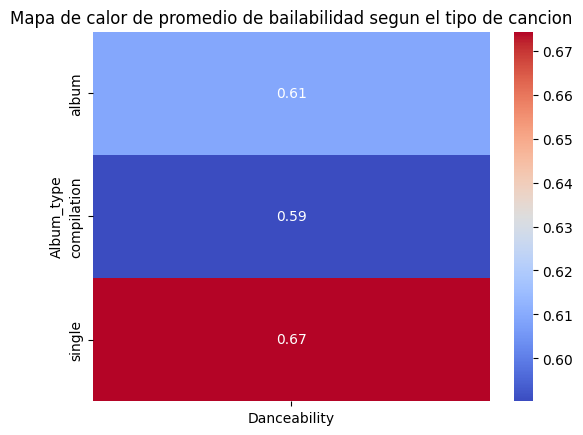

In [10]:
heatmap_data = low_likes.groupby('Album_type', as_index=False)['Danceability'].mean().set_index('Album_type')
plt.title('Mapa de calor de promedio de bailabilidad segun el tipo de cancion')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')

/tmp/ipython-input-3256258061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='Artist', y='Stream', palette='viridis')


                  Artist        Stream
0  Red Hot Chili Peppers  5.628055e+09
1              Sam Smith  4.775585e+09
2             Katy Perry  4.655496e+09


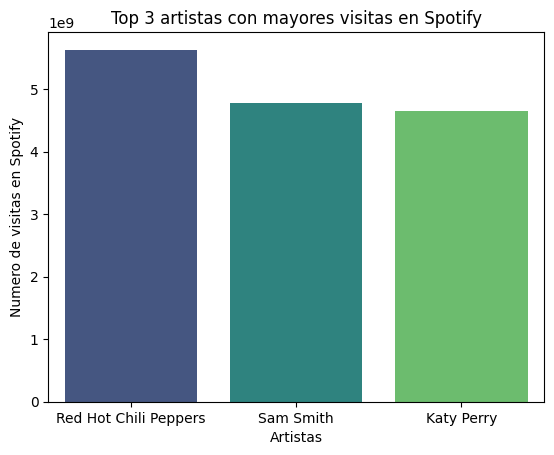

In [11]:
# Identificar Los tres artistas con el mayor total de "Stream"
top_artists = low_likes.groupby('Artist')['Stream'].sum().sort_values(ascending=False).reset_index().head(3)

# Personalizar el gráfico
plt.title('Top 3 artistas con mayores visitas en Spotify')
plt.xlabel('Artistas')
plt.ylabel('Numero de visitas en Spotify')

# Crear un gráfico de barras para comparar los totales
sns.barplot(data=top_artists, x='Artist', y='Stream', palette='viridis')

# Mostrar los datos del análisis
print(top_artists)